In [1]:
import pickle
with open('CV_results.pickle', 'rb') as file:
    CV_results = pickle.load(file)
    

In [3]:
import numpy as np
# Print the average MSE and R-squared values for each model
for model_name, model_results in CV_results.items():
    print(f"{model_name} - Average MSE: {np.mean(model_results['mse'])}")
    print(f"{model_name} - Average R-squared: {np.mean(model_results['r_squared'])}")

rf - Average MSE: 70.30974023492061
rf - Average R-squared: 0.8101496535053767
lr - Average MSE: 106.82065585836162
lr - Average R-squared: 0.7117825379556579
svm - Average MSE: 90.41466515047632
svm - Average R-squared: 0.7560451437845004
gbdt - Average MSE: 70.55279908672652
gbdt - Average R-squared: 0.8095313612591266
gbrf - Average MSE: 68.01203470270113
gbrf - Average R-squared: 0.8165098706484301
transformer_cnn - Average MSE: 74.22231011646878
transformer_cnn - Average R-squared: 0.7997836091783046
mlp - Average MSE: 70.00989851888764
mlp - Average R-squared: 0.8113137281841244
cnn - Average MSE: 71.38202684349044
cnn - Average R-squared: 0.8073058061898983
lr-horvath - Average MSE: 83.32123928904142
lr-horvath - Average R-squared: 0.7749070685288426
rf-horvath - Average MSE: 68.89830705247866
rf-horvath - Average R-squared: 0.8142857472577696
gbdt-horvath - Average MSE: 67.15795029470992
gbdt-horvath - Average R-squared: 0.8190221258072062
gbrf-horvath - Average MSE: 63.5873253

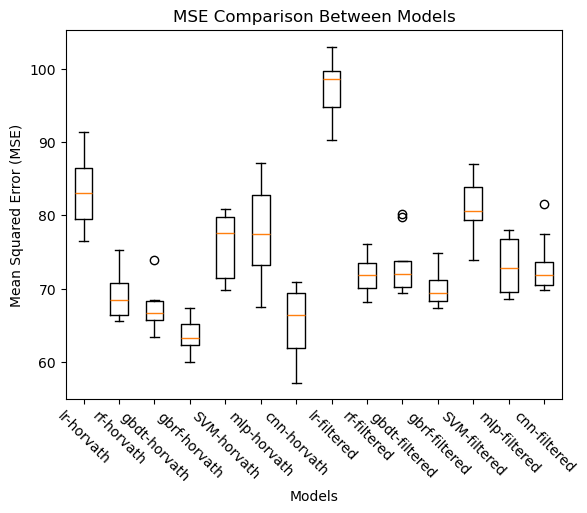

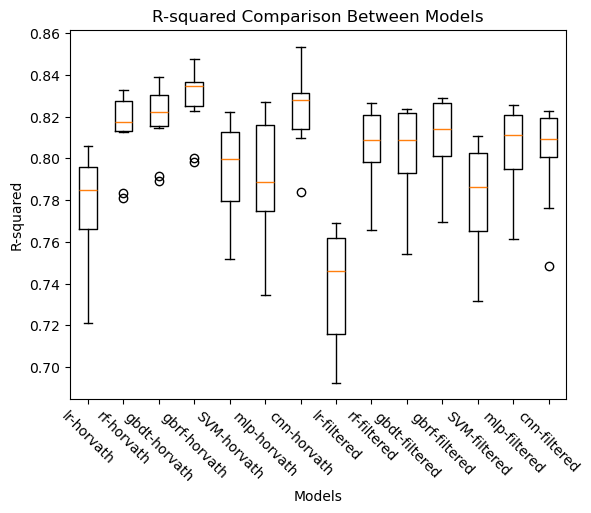

In [7]:
import matplotlib.pyplot as plt
import numpy as np

# Filter models with names containing 'filtered' or 'horvath'
filtered_models = {key: value for key, value in CV_results.items() if 'filtered' in key or 'horvath' in key}

# Create box plots for MSE
mse_values = [np.array(model_results['mse']) for model_results in filtered_models.values()]
plt.boxplot(mse_values, labels=filtered_models.keys())
plt.title('MSE Comparison Between Models')
plt.xlabel('Models')
plt.ylabel('Mean Squared Error (MSE)')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=-45)
plt.show()

# Create box plots for R-squared
r_squared_values = [np.array(model_results['r_squared']) for model_results in filtered_models.values()]
plt.boxplot(r_squared_values, labels=filtered_models.keys())
plt.title('R-squared Comparison Between Models')

plt.xlabel('Models')
plt.ylabel('R-squared')
# Rotate x-axis labels by 45 degrees
plt.xticks(rotation=-45)
plt.show()


# Cross validation

## Load data

In [49]:
import pickle
# Load the combined_pivoted_samples_data object from the local file
with open('combined_pivoted_samples_data_2_resetsampleid_clean.pickle', 'rb') as file:
    combined_pivoted_samples_2_clean = pickle.load(file)

In [50]:
combined_pivoted_samples_2_clean

,0,1,2,3,4,5,6,7,8,9,...,6397,6398,6399,6400,6401,6402,6403,6404,6405,6406
cg00000029,0.464197,0.454883,0.485764,0.480785,0.501220,0.499918,0.485852,0.512442,0.518155,0.417986,...,0.555312,0.479882,0.485316,0.511304,0.534741,0.516068,0.402368,0.432730,0.528200,0.452750
cg00000108,0.941091,0.939033,0.918802,0.929908,0.934548,0.950543,0.925855,0.941330,0.938528,0.933814,...,0.930338,0.933958,0.922079,0.937618,0.937884,0.936129,0.906900,0.921907,0.942789,0.908963
cg00000109,0.911182,0.596455,0.870333,0.889689,0.890450,0.898493,0.893972,0.892010,0.900841,0.883539,...,0.904574,0.906665,0.869559,0.901234,0.921915,0.880211,0.836376,0.898407,0.872703,0.917163
cg00000165,0.132014,0.206917,0.162861,0.197780,0.148437,0.224093,0.400489,0.194553,0.134710,0.204569,...,0.197673,0.201347,0.235386,0.234210,0.239195,0.330298,0.225160,0.243233,0.185050,0.203322
cg00000236,0.717861,0.723935,0.719196,0.704061,0.754913,0.829192,0.723782,0.695142,0.731872,0.742913,...,0.684694,0.667625,0.651572,0.641138,0.697076,0.675419,0.760541,0.702650,0.662514,0.679006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.9.98937537R,0.042808,0.036811,0.042844,0.042258,0.039613,0.035309,0.031304,0.031119,0.031373,0.039919,...,0.066904,0.058422,0.071169,0.081995,0.064735,0.080378,0.072304,0.059447,0.067503,0.079340
ch.9.98957343R,0.052589,0.053343,0.045973,0.048733,0.039254,0.043023,0.037075,0.048277,0.041296,0.049226,...,0.097625,0.078774,0.084208,0.086902,0.094795,0.087245,0.061635,0.076514,0.075343,0.092468
ch.9.98959675F,0.035624,0.075618,0.126421,0.084051,0.165874,0.088889,0.097599,0.084294,0.052505,0.098726,...,0.212610,0.186146,0.176043,0.161922,0.191574,0.171343,0.380859,0.229945,0.186564,0.210487
ch.9.98989607R,0.028066,0.017428,0.021752,0.027504,0.020889,0.025469,0.018837,0.021279,0.015910,0.020918,...,0.067896,0.054130,0.049284,0.063500,0.051460,0.052651,0.062921,0.052991,0.050036,0.050322


In [31]:
import pickle
with open('results_df_combined2_clean.pickle', 'rb') as file:
    results_df_combined2_clean = pickle.load(file)

In [51]:
import pickle
with open('combined_phenodata_clean.pickle', 'rb') as file:
    combined_phenodata_clean = pickle.load(file)

In [52]:
combined_phenodata_clean

,index,Gender,Tissue,Cell type,GEO series id,Tissue_origin,Age at collection months,Ethnicity,Disease state,Smoking,Tissue_original,Twin,"Gender(1=m, 2=f)",dataset,Age
0,GSM989827,F,peripheral blood,whole,GSE40279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,67.0
1,GSM989828,F,peripheral blood,whole,GSE40279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
2,GSM989829,F,peripheral blood,whole,GSE40279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,66.0
3,GSM989830,F,peripheral blood,whole,GSE40279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0
4,GSM989831,F,peripheral blood,whole,GSE40279,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,62.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6402,GSM1354401,NaN,peripheral blood,CD14+ cell,GSE56046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,56.0
6403,GSM1354402,NaN,peripheral blood,CD14+ cell,GSE56046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0
6404,GSM1354403,NaN,peripheral blood,CD14+ cell,GSE56046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6405,GSM1354404,NaN,peripheral blood,CD14+ cell,GSE56046,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0


In [5]:
import pickle
with open('combined_pivoted_samples_2_horvath_clean.pickle', 'rb') as file:
    combined_pivoted_samples_2_horvath_clean = pickle.load(file)

In [33]:
import pickle
# Load themi_results_df_combined2_clean object from the local file
with open('mi_results_df_combined2_clean.pickle', 'rb') as file:
    mi_results_df_combined2_clean = pickle.load(file)

## Filter expression data based on selected CpGs (by R-squared)

In [34]:
condition = results_df_combined2_clean['R-squared'] > 0.25
extract = results_df_combined2_clean.loc[condition, ['Probe_ID', 'R-squared']]
extract_probes_id = extract['Probe_ID'].tolist()
filtered_pivoted_data = combined_pivoted_samples_2_clean.loc[extract_probes_id, :]

In [35]:
len(extract_probes_id)

4320

## Filter expression data based on selected CpGs (by MI)

In [36]:
print(mi_results_df_combined2_clean)

          Probe_ID  Mutual_Information
300208  cg16867657            0.662971
125211  cg06639320            0.633896
455889  cg26961332            0.622407
384535  cg22454769            0.599804
133849  cg07082267            0.583828
...            ...                 ...
336407  cg19222366            0.000000
196585  cg10703506            0.000000
336342  cg19217463            0.000000
375733  cg21829490            0.000000
329907  cg18771570            0.000000

[470417 rows x 2 columns]


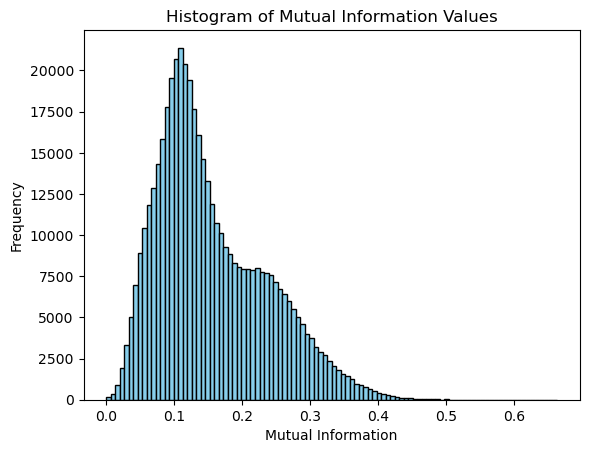

In [29]:
import matplotlib.pyplot as plt

# Assuming mi_results_df_combined2_clean is your DataFrame containing 'Mutual_Information' column
# Replace 'Mutual_Information' with the actual column name if it's different
mutual_info_values = mi_results_df_combined2_clean['Mutual_Information']

# Plot histogram
plt.hist(mutual_info_values, bins=100, color='skyblue', edgecolor='black')

# Add labels and title
plt.xlabel('Mutual Information')
plt.ylabel('Frequency')
plt.title('Histogram of Mutual Information Values')

# Show plot
plt.show()


In [20]:
mi_results_df_combined2_clean.iloc[:len(extract_probes_id)]['Probe_ID'].tolist()

['cg16867657',
 'cg06639320',
 'cg26961332',
 'cg22454769',
 'cg07082267',
 'cg24668061',
 'cg14213814',
 'cg08262002',
 'cg02787560',
 'cg22796704',
 'cg24079702',
 'cg17342469',
 'cg21644334',
 'cg11985321',
 'cg18215449',
 'cg25834632',
 'cg09186408',
 'cg02152290',
 'cg21572722',
 'cg13826564',
 'cg21333208',
 'cg14692377',
 'cg00876267',
 'cg03548062',
 'cg19283806',
 'cg13740135',
 'cg20273670',
 'cg24716664',
 'cg07575466',
 'cg12079303',
 'cg14076977',
 'cg04265051',
 'cg14377739',
 'cg23076870',
 'cg18630178',
 'cg04875128',
 'cg18397073',
 'cg27048684',
 'cg08005809',
 'cg23956190',
 'cg00439658',
 'cg25440680',
 'cg11693709',
 'cg10778915',
 'cg10501210',
 'cg01176141',
 'cg04208403',
 'cg02323405',
 'cg09310092',
 'cg11649376',
 'cg12934382',
 'cg11862144',
 'cg04742397',
 'cg11552829',
 'cg07547549',
 'cg06493994',
 'cg03339668',
 'cg03032497',
 'cg23500537',
 'cg03841065',
 'cg25574765',
 'cg05881698',
 'cg22824635',
 'cg15417875',
 'cg11436113',
 'cg02636004',
 'cg266859

In [37]:
MI_extract_probes_id = mi_results_df_combined2_clean.iloc[:len(extract_probes_id)]['Probe_ID'].tolist()
MI_filtered_pivoted_data = combined_pivoted_samples_2_clean.loc[MI_extract_probes_id, :]

In [38]:
print(MI_filtered_pivoted_data)

                0         1         2         3         4         5     \
cg16867657  0.651194  0.751090  0.672077  0.684481  0.664573  0.828496   
cg06639320  0.467484  0.554684  0.497623  0.495958  0.474316  0.540942   
cg26961332  0.996601  0.996633  0.992308  0.996558  0.995753  0.997042   
cg22454769  0.563600  0.704345  0.605543  0.628087  0.560501  0.659044   
cg07082267  0.401409  0.328262  0.384356  0.363681  0.379792  0.419584   
...              ...       ...       ...       ...       ...       ...   
cg21424703  0.076983  0.062618  0.064094  0.062202  0.051199  0.074657   
cg07004075  0.820347  0.816791  0.792106  0.850124  0.852089  0.808040   
cg08198075  0.761500  0.819816  0.786384  0.776370  0.763615  0.699602   
cg21202240  0.858567  0.852144  0.829673  0.836315  0.846675  0.842176   
cg12174175  0.875933  0.886099  0.884499  0.863985  0.882773  0.871162   

                6         7         8         9     ...      6397      6398  \
cg16867657  0.715064  0.731963  

### Save MI_filtered_pivoted_data

In [48]:
import pickle
with open('MI_filtered_pivoted_data.pickle', 'wb') as file:
    pickle.dump(MI_filtered_pivoted_data, file)

## Venn of MI_ids and extract_ids

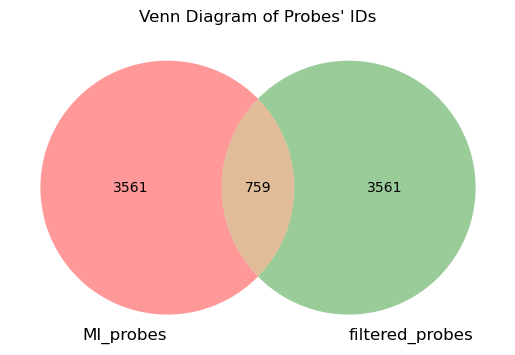

In [39]:
from matplotlib import pyplot as plt
from matplotlib_venn import venn2

# Convert lists to sets for easy comparison
MI_set = set(MI_extract_probes_id)
extract_set = set(extract_probes_id)

# Create the Venn diagram
venn2([MI_set, extract_set], ('MI_probes', 'filtered_probes'))

# Display the plot
plt.title("Venn Diagram of Probes' IDs")
plt.show()


## Create a dic to store CV results

In [7]:
CV_results2 = {}

### Save and Load

In [8]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

In [40]:
import pickle
with open('CV_results2.pickle', 'rb') as file:
    CV_results2 = pickle.load(file)

In [41]:
CV_results2.keys()

dict_keys(['lr-filtered-R025', 'rf-filtered-R025', 'lr-horvath', 'rf-horvath', 'svr-filtered', 'svr-horvath', 'mlp-filtered', 'mlp-horvath', 'gbdt-filtered', 'gbdt-horvath', 'cnn-horvath'])

## LR & RF - filtered

In [9]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define categorical and numerical features
categorical_features = ['Tissue', 'Cell type']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
    ('scaler', RobustScaler())  # You can use other scalers as well
])

# Use ColumnTransformer to apply different preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=4, min_samples_leaf=3, random_state=10)

# Create a linear regression model
lr_model = LinearRegression()

# Create and fit the final pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', rf_model)])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', lr_model)])

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
rf_filtered_mse_list = []
rf_filtered_r_squared_list = []
rf_filtered_prop10_list = []
rf_filtered_prop5_list = []

lr_filtered_mse_list = []
lr_filtered_r_squared_list = []
lr_filtered_prop10_list = []
lr_filtered_prop5_list = []

    
# Perform cross-validation for Linear Regression
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(lr_pipeline, X_test, y_test)
    
    lr_filtered_mse_list.append(mse)
    lr_filtered_r_squared_list.append(r_squared)
    lr_filtered_prop10_list.append(prop10)
    lr_filtered_prop5_list.append(prop5)
    
# Print the average MSE and R-squared values
print("Average MSE:", np.mean(lr_filtered_mse_list))
print("Average R-squared:", np.mean(lr_filtered_r_squared_list))
print("Average prop10:", np.mean(lr_filtered_prop10_list))
print("Average prop5:", np.mean(lr_filtered_prop5_list))

# Perform cross-validation for Random Forest
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(rf_pipeline, X_test, y_test)
    
    rf_filtered_mse_list.append(mse)
    rf_filtered_r_squared_list.append(r_squared)
    rf_filtered_prop10_list.append(prop10)
    rf_filtered_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(rf_filtered_mse_list))
print("Average R-squared:", np.mean(rf_filtered_r_squared_list))
print("Average prop10:", np.mean(rf_filtered_prop10_list))
print("Average prop5:", np.mean(rf_filtered_prop5_list))

CV_results2['lr-filtered-R025'] = {'mse': lr_filtered_mse_list,
                                   'r_squared': lr_filtered_r_squared_list,
                                   'prop10': lr_filtered_prop10_list,
                                   'prop5': lr_filtered_prop5_list}

CV_results2['rf-filtered-R025'] = {'mse': rf_filtered_mse_list,
                                   'r_squared': rf_filtered_r_squared_list,
                                   'prop10': rf_filtered_prop10_list,
                                   'prop5': rf_filtered_prop5_list}

Average MSE: 292.3923759763344
Average R-squared: 0.2118888571002277
Average prop10: 0.46714045436817475
Average prop5: 0.24215581123244928
Average MSE: 61.73598703494836
Average R-squared: 0.8333415926116017
Average prop10: 0.8014021060842433
Average prop5: 0.5579948322932917


## LR & RF - horvath

In [10]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define categorical and numerical features
categorical_features = ['Tissue', 'Cell type']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
    ('scaler', RobustScaler())  # You can use other scalers as well
])

# Use ColumnTransformer to apply different preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=4, min_samples_leaf=3, random_state=10)

# Create a linear regression model
lr_model = LinearRegression()

# Create and fit the final pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', rf_model)])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', lr_model)])

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
rf_horvath_mse_list = []
rf_horvath_r_squared_list = []
rf_horvath_prop10_list = []
rf_horvath_prop5_list = []

lr_horvath_mse_list = []
lr_horvath_r_squared_list = []
lr_horvath_prop10_list = []
lr_horvath_prop5_list = []

    
# Perform cross-validation for Linear Regression
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(lr_pipeline, X_test, y_test)
    
    lr_horvath_mse_list.append(mse)
    lr_horvath_r_squared_list.append(r_squared)
    lr_horvath_prop10_list.append(prop10)
    lr_horvath_prop5_list.append(prop5)
    
# Print the average MSE and R-squared values
print("Average MSE:", np.mean(lr_horvath_mse_list))
print("Average R-squared:", np.mean(lr_horvath_r_squared_list))
print("Average prop10:", np.mean(lr_horvath_prop10_list))
print("Average prop5:", np.mean(lr_horvath_prop5_list))

# Perform cross-validation for Random Forest
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(rf_pipeline, X_test, y_test)
    
    rf_horvath_mse_list.append(mse)
    rf_horvath_r_squared_list.append(r_squared)
    rf_horvath_prop10_list.append(prop10)
    rf_horvath_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(rf_horvath_mse_list))
print("Average R-squared:", np.mean(rf_horvath_r_squared_list))
print("Average prop10:", np.mean(rf_horvath_prop10_list))
print("Average prop5:", np.mean(rf_horvath_prop5_list))

CV_results2['lr-horvath'] = {'mse': lr_horvath_mse_list,
                                   'r_squared': lr_horvath_r_squared_list,
                                   'prop10': lr_horvath_prop10_list,
                                   'prop5': lr_horvath_prop5_list}

CV_results2['rf-horvath'] = {'mse': rf_horvath_mse_list,
                                   'r_squared': rf_horvath_r_squared_list,
                                   'prop10': rf_horvath_prop10_list,
                                   'prop5': rf_horvath_prop5_list}

Average MSE: 83.32123928904142
Average R-squared: 0.7749070685288426
Average prop10: 0.7662751072542902
Average prop5: 0.47727769110764423
Average MSE: 68.89830705247866
Average R-squared: 0.8142857472577696
Average prop10: 0.7804777691107644
Average prop5: 0.5145895085803432


In [11]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## LR & RF - MI

In [42]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt

def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = MI_filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define categorical and numerical features
categorical_features = ['Tissue', 'Cell type']
numerical_features = [col for col in X.columns if col not in categorical_features]

# Create transformers for numerical and categorical features
numerical_transformer = Pipeline(steps=[
    ('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
    ('scaler', RobustScaler())  # You can use other scalers as well
])

# Use ColumnTransformer to apply different preprocessing to numerical and categorical features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features)
    ])

# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, min_samples_split=4, min_samples_leaf=3, random_state=10)

# Create a linear regression model
lr_model = LinearRegression()

# Create and fit the final pipelines
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', rf_model)])

lr_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('regressor', lr_model)])

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
rf_MI_mse_list = []
rf_MI_r_squared_list = []
rf_MI_prop10_list = []
rf_MI_prop5_list = []

lr_MI_mse_list = []
lr_MI_r_squared_list = []
lr_MI_prop10_list = []
lr_MI_prop5_list = []

    
# Perform cross-validation for Linear Regression
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    lr_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(lr_pipeline, X_test, y_test)
    
    lr_MI_mse_list.append(mse)
    lr_MI_r_squared_list.append(r_squared)
    lr_MI_prop10_list.append(prop10)
    lr_MI_prop5_list.append(prop5)
    
# Print the average MSE and R-squared values
print("Average MSE:", np.mean(lr_MI_mse_list))
print("Average R-squared:", np.mean(lr_MI_r_squared_list))
print("Average prop10:", np.mean(lr_MI_prop10_list))
print("Average prop5:", np.mean(lr_MI_prop5_list))

# Perform cross-validation for Random Forest
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    rf_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(rf_pipeline, X_test, y_test)
    
    rf_MI_mse_list.append(mse)
    rf_MI_r_squared_list.append(r_squared)
    rf_MI_prop10_list.append(prop10)
    rf_MI_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(rf_MI_mse_list))
print("Average R-squared:", np.mean(rf_MI_r_squared_list))
print("Average prop10:", np.mean(rf_MI_prop10_list))
print("Average prop5:", np.mean(rf_MI_prop5_list))

CV_results2['lr-MI'] = {'mse': lr_MI_mse_list,
                        'r_squared': lr_MI_r_squared_list,
                        'prop10': lr_MI_prop10_list,
                        'prop5': lr_MI_prop5_list}

CV_results2['rf-MI'] = {'mse': rf_MI_mse_list,
                         'r_squared': rf_MI_r_squared_list,
                         'prop10': rf_MI_prop10_list,
                         'prop5': rf_MI_prop5_list}

Average MSE: 325.92444578287945
Average R-squared: 0.12069234117925723
Average prop10: 0.4466870612324493
Average prop5: 0.239350624024961
Average MSE: 59.89949956877656
Average R-squared: 0.8382924599675826
Average prop10: 0.8103022620904836
Average prop5: 0.5642384945397816


## SVR - filtered

In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
svr_filtered_mse_list = []
svr_filtered_r_squared_list = []
svr_filtered_prop10_list = []
svr_filtered_prop5_list = []

# Perform cross-validation for SVM
svm_model = SVR(kernel='rbf')  # You can choose a different kernel if needed
svm_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                ('scaler', RobustScaler()),
                                ('regressor', svm_model)])

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(svm_pipeline, X_test, y_test)
    
    svr_filtered_mse_list.append(mse)
    svr_filtered_r_squared_list.append(r_squared)
    svr_filtered_prop10_list.append(prop10)
    svr_filtered_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(svr_filtered_mse_list))
print("Average R-squared:", np.mean(svr_filtered_r_squared_list))
print("Average prop10:", np.mean(svr_filtered_prop10_list))
print("Average prop5:", np.mean(svr_filtered_prop5_list))

CV_results2['svr-filtered'] = {'mse': svr_filtered_mse_list,
                                'r_squared': svr_filtered_r_squared_list,
                                'prop10': svr_filtered_prop10_list,
                                'prop5': svr_filtered_prop5_list}

Average MSE: 84.51871319424842
Average R-squared: 0.7718912235778657
Average prop10: 0.760805625975039
Average prop5: 0.5064725526521061


In [13]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## SVR - horvath

In [14]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
svr_horvath_mse_list = []
svr_horvath_r_squared_list = []
svr_horvath_prop10_list = []
svr_horvath_prop5_list = []

# Perform cross-validation for SVM
svm_model = SVR(kernel='rbf')  # You can choose a different kernel if needed
svm_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                ('scaler', RobustScaler()),
                                ('regressor', svm_model)])

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(svm_pipeline, X_test, y_test)
    
    svr_horvath_mse_list.append(mse)
    svr_horvath_r_squared_list.append(r_squared)
    svr_horvath_prop10_list.append(prop10)
    svr_horvath_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(svr_horvath_mse_list))
print("Average R-squared:", np.mean(svr_horvath_r_squared_list))
print("Average prop10:", np.mean(svr_horvath_prop10_list))
print("Average prop5:", np.mean(svr_horvath_prop5_list))

CV_results2['svr-horvath'] = {'mse': svr_horvath_mse_list,
                                'r_squared': svr_horvath_r_squared_list,
                                'prop10': svr_horvath_prop10_list,
                                'prop5': svr_horvath_prop5_list}

Average MSE: 86.37845644511474
Average R-squared: 0.7673020609509977
Average prop10: 0.7515927262090484
Average prop5: 0.49163660296411854


In [15]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## SVR - MI

In [43]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = MI_filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

# Initialize lists to store MSE and R-squared for each fold
svr_MI_mse_list = []
svr_MI_r_squared_list = []
svr_MI_prop10_list = []
svr_MI_prop5_list = []

# Perform cross-validation for SVM
svm_model = SVR(kernel='rbf')  # You can choose a different kernel if needed
svm_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                ('scaler', RobustScaler()),
                                ('regressor', svm_model)])

for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    svm_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(svm_pipeline, X_test, y_test)
    
    svr_MI_mse_list.append(mse)
    svr_MI_r_squared_list.append(r_squared)
    svr_MI_prop10_list.append(prop10)
    svr_MI_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(svr_MI_mse_list))
print("Average R-squared:", np.mean(svr_MI_r_squared_list))
print("Average prop10:", np.mean(svr_MI_prop10_list))
print("Average prop5:", np.mean(svr_MI_prop5_list))

CV_results2['svr-MI'] = {'mse': svr_MI_mse_list,
                         'r_squared': svr_MI_r_squared_list,
                         'prop10': svr_MI_prop10_list,
                         'prop5': svr_MI_prop5_list}

Average MSE: 103.41684987230319
Average R-squared: 0.7218117173801198
Average prop10: 0.6663494539781591
Average prop5: 0.37611130070202814


## MLP-filtered

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the evaluate_model function
def evaluate_model(model, X, y):
    # Predict the target values
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    print("Shapes - y_pred:", y_pred.shape, "y:", y.shape)
    
    # Calculate error metrics
    error = y_pred - y
    mse = np.mean(error ** 2)
    r_squared = 1 - (np.sum(error ** 2) / np.sum((y - np.mean(y)) ** 2))
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = filtered_pivoted_data.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float64')
y = y.astype('float64')

# Perform cross-validation for MLP
def mlp_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Dense Layers with Dropout
    x = Dense(units=256, activation='relu')(inputs)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=50,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.7,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mlp_filtered_mse_list = []
mlp_filtered_r_squared_list = []
mlp_filtered_prop10_list = []
mlp_filtered_prop5_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create mlp model with dropout
    model_mlp = mlp_model_with_dropout((X_train.shape[1]), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_idx}.h5',  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_mlp.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks including ModelCheckpoint
    model_mlp.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # After training, you can load the best model using the following:
    best_model_mlp = load_model(f'best_model_fold_{fold_idx}.h5')

    # Evaluate the model on the test set
    mse, r_squared, prop10, prop5 = evaluate_model(best_model_mlp, X_test_scaled, y_test)

    mlp_filtered_mse_list.append(mse)
    mlp_filtered_r_squared_list.append(r_squared)
    mlp_filtered_prop10_list.append(prop10)
    mlp_filtered_prop5_list.append(prop5)

    # Optionally: Remove the temporary file to save disk space
    os.remove(f'best_model_fold_{fold_idx}.h5')

# Print the results
print("Mean MSE:", np.mean(mlp_filtered_mse_list))
print("Mean R-squared:", np.mean(mlp_filtered_r_squared_list))
print("Average prop10:", np.mean(mlp_filtered_prop10_list))
print("Average prop5:", np.mean(mlp_filtered_prop5_list))

CV_results2['mlp-filtered'] = {'mse': mlp_filtered_mse_list,
                               'r_squared': mlp_filtered_r_squared_list,
                               'prop10': mlp_filtered_prop10_list,
                               'prop5': mlp_filtered_prop5_list}

Epoch 1/500
79/91 [=========================>....] - ETA: 0s - loss: 1007.8340
Epoch 1: val_loss improved from inf to 139.37164, saving model to best_model_fold_0.h5
91/91 [==============================] - 1s 6ms/step - loss: 906.4651 - val_loss: 139.3716 - lr: 0.0100
Epoch 2/500
83/91 [==========================>...] - ETA: 0s - loss: 153.0602
Epoch 2: val_loss improved from 139.37164 to 111.91378, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 3ms/step - loss: 151.5364 - val_loss: 111.9138 - lr: 0.0100
Epoch 3/500
83/91 [==========================>...] - ETA: 0s - loss: 118.5351
Epoch 3: val_loss improved from 111.91378 to 96.86726, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 3ms/step - loss: 118.3970 - val_loss: 96.8673 - lr: 0.0100
Epoch 4/500
82/91 [==========================>...] - ETA: 0s - loss: 100.4965
Epoch 4: val_loss did not improve from 96.86726
91/91 [==============================] - 0s 3ms/step - l

In [20]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## MLP-horvath

In [22]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the evaluate_model function
def evaluate_model(model, X, y):
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5

'''
def evaluate_model(model, X, y):
    # Predict the target values
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    print("Shapes - y_pred:", y_pred.shape, "y:", y.shape)
    
    # Calculate error metrics
    error = y_pred - y
    mse = np.mean(error ** 2)
    r_squared = 1 - (np.sum(error ** 2) / np.sum((y - np.mean(y)) ** 2))
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    
    return mse, r_squared, prop10, prop5
'''

# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float64')
y = y.astype('float64')

# Perform cross-validation for MLP
def mlp_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Dense Layers with Dropout
    x = Dense(units=256, activation='relu')(inputs)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=50,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.7,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mlp_horvath_mse_list = []
mlp_horvath_r_squared_list = []
mlp_horvath_prop10_list = []
mlp_horvath_prop5_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create mlp model with dropout
    model_mlp = mlp_model_with_dropout((X_train.shape[1]), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_idx}.h5',  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_mlp.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks including ModelCheckpoint
    model_mlp.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # After training, you can load the best model using the following:
    best_model_mlp = load_model(f'best_model_fold_{fold_idx}.h5')

    # Evaluate the model on the test set
    mse, r_squared, prop10, prop5 = evaluate_model(best_model_mlp, X_test_scaled, y_test)

    mlp_horvath_mse_list.append(mse)
    mlp_horvath_r_squared_list.append(r_squared)
    mlp_horvath_prop10_list.append(prop10)
    mlp_horvath_prop5_list.append(prop5)

    # Optionally: Remove the temporary file to save disk space
    os.remove(f'best_model_fold_{fold_idx}.h5')

# Print the results
print("Mean MSE:", np.mean(mlp_horvath_mse_list))
print("Mean R-squared:", np.mean(mlp_horvath_r_squared_list))
print("Average prop10:", np.mean(mlp_horvath_prop10_list))
print("Average prop5:", np.mean(mlp_horvath_prop5_list))

CV_results2['mlp-horvath'] = {'mse': mlp_horvath_mse_list,
                               'r_squared': mlp_horvath_r_squared_list,
                               'prop10': mlp_horvath_prop10_list,
                               'prop5': mlp_horvath_prop5_list}

Epoch 1/500
71/91 [======================>.......] - ETA: 0s - loss: 353.1910
Epoch 1: val_loss improved from inf to 301.06271, saving model to best_model_fold_0.h5
91/91 [==============================] - 1s 4ms/step - loss: 314.9818 - val_loss: 301.0627 - lr: 0.0100
Epoch 2/500
85/91 [===========================>..] - ETA: 0s - loss: 148.2304
Epoch 2: val_loss improved from 301.06271 to 129.91440, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 3ms/step - loss: 148.1364 - val_loss: 129.9144 - lr: 0.0100
Epoch 3/500
90/91 [============================>.] - ETA: 0s - loss: 119.1205
Epoch 3: val_loss improved from 129.91440 to 128.81563, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 3ms/step - loss: 119.1520 - val_loss: 128.8156 - lr: 0.0100
Epoch 4/500
82/91 [==========================>...] - ETA: 0s - loss: 116.9422
Epoch 4: val_loss improved from 128.81563 to 95.81544, saving model to best_model_fold_0.h5
91/91 [====

In [47]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## MLP - MI

In [46]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import ModelCheckpoint
import os

# Define the evaluate_model function
def evaluate_model(model, X, y):
    # Predict the target values
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    print("Shapes - y_pred:", y_pred.shape, "y:", y.shape)
    
    # Calculate error metrics
    error = y_pred - y
    mse = np.mean(error ** 2)
    r_squared = 1 - (np.sum(error ** 2) / np.sum((y - np.mean(y)) ** 2))
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = MI_filtered_pivoted_data.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float64')
y = y.astype('float64')

# Perform cross-validation for MLP
def mlp_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Dense Layers with Dropout
    x = Dense(units=256, activation='relu')(inputs)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model

# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=50,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.7,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

mlp_MI_mse_list = []
mlp_MI_r_squared_list = []
mlp_MI_prop10_list = []
mlp_MI_prop5_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create mlp model with dropout
    model_mlp = mlp_model_with_dropout((X_train.shape[1]), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_idx}.h5',  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_mlp.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks including ModelCheckpoint
    model_mlp.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # After training, you can load the best model using the following:
    best_model_mlp = load_model(f'best_model_fold_{fold_idx}.h5')

    # Evaluate the model on the test set
    mse, r_squared, prop10, prop5 = evaluate_model(best_model_mlp, X_test_scaled, y_test)

    mlp_MI_mse_list.append(mse)
    mlp_MI_r_squared_list.append(r_squared)
    mlp_MI_prop10_list.append(prop10)
    mlp_MI_prop5_list.append(prop5)

    # Optionally: Remove the temporary file to save disk space
    os.remove(f'best_model_fold_{fold_idx}.h5')

# Print the results
print("Mean MSE:", np.mean(mlp_MI_mse_list))
print("Mean R-squared:", np.mean(mlp_MI_r_squared_list))
print("Average prop10:", np.mean(mlp_MI_prop10_list))
print("Average prop5:", np.mean(mlp_MI_prop5_list))

CV_results2['mlp-MI'] = {'mse': mlp_MI_mse_list,
                         'r_squared': mlp_MI_r_squared_list,
                         'prop10': mlp_MI_prop10_list,
                         'prop5': mlp_MI_prop5_list}

Epoch 1/500
81/91 [=========================>....] - ETA: 0s - loss: 6782.5996
Epoch 1: val_loss improved from inf to 168.61703, saving model to best_model_fold_0.h5
91/91 [==============================] - 1s 7ms/step - loss: 6127.9487 - val_loss: 168.6170 - lr: 0.0100
Epoch 2/500
76/91 [========================>.....] - ETA: 0s - loss: 165.9261
Epoch 2: val_loss improved from 168.61703 to 149.05870, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 4ms/step - loss: 164.0616 - val_loss: 149.0587 - lr: 0.0100
Epoch 3/500
77/91 [========================>.....] - ETA: 0s - loss: 127.1387
Epoch 3: val_loss improved from 149.05870 to 92.75224, saving model to best_model_fold_0.h5
91/91 [==============================] - 0s 4ms/step - loss: 125.0240 - val_loss: 92.7522 - lr: 0.0100
Epoch 4/500
87/91 [===========================>..] - ETA: 0s - loss: 116.0194
Epoch 4: val_loss improved from 92.75224 to 84.46534, saving model to best_model_fold_0.h5
91/91 [=====

## GBDT-filtered

In [12]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)


In [13]:
# Perform cross-validation for GBDT
gbdt_model = XGBRegressor(n_estimators=100,
                          learning_rate=0.05,
                          max_depth=10,
                          subsample= 0.9,
                          min_child_weight= 2,
                          random_state=10,
                          tree_method='hist',
                          device='cuda')

gbdt_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                  ('regressor', gbdt_model)])

gbdt_filtered_mse_list = []
gbdt_filtered_r_squared_list = []
gbdt_filtered_prop10_list = []
gbdt_filtered_prop5_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gbdt_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(gbdt_pipeline, X_test, y_test)
    
    gbdt_filtered_mse_list.append(mse)
    gbdt_filtered_r_squared_list.append(r_squared)
    gbdt_filtered_prop10_list.append(prop10)
    gbdt_filtered_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(gbdt_filtered_mse_list))
print("Average R-squared:", np.mean(gbdt_filtered_r_squared_list))
print("Average prop10:", np.mean(gbdt_filtered_prop10_list))
print("Average prop5:", np.mean(gbdt_filtered_prop5_list))

CV_results2['gbdt-filtered'] = {'mse': gbdt_filtered_mse_list,
                               'r_squared': gbdt_filtered_r_squared_list,
                               'prop10': gbdt_filtered_prop10_list,
                               'prop5': gbdt_filtered_prop5_list}


c:\Users\tokyo\anaconda3\envs\tensorflow_use\lib\site-packages\xgboost\core.py:160: UserWarning: [17:13:34] WARNING: D:\bld\xgboost-split_1703077804448\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Average MSE: 59.19932039744748
Average R-squared: 0.8401362642351794
Average prop10: 0.8160788806552262
Average prop5: 0.5787551189547582


In [14]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## GBDT-horvath

In [15]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)


In [16]:
# Perform cross-validation for GBDT
gbdt_model = XGBRegressor(n_estimators=100,
                          learning_rate=0.05,
                          max_depth=10,
                          subsample= 0.9,
                          min_child_weight= 2,
                          random_state=10,
                          tree_method='hist',
                          device='cuda')

gbdt_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                  ('regressor', gbdt_model)])

gbdt_horvath_mse_list = []
gbdt_horvath_r_squared_list = []
gbdt_horvath_prop10_list = []
gbdt_horvath_prop5_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gbdt_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(gbdt_pipeline, X_test, y_test)
    
    gbdt_horvath_mse_list.append(mse)
    gbdt_horvath_r_squared_list.append(r_squared)
    gbdt_horvath_prop10_list.append(prop10)
    gbdt_horvath_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(gbdt_horvath_mse_list))
print("Average R-squared:", np.mean(gbdt_horvath_r_squared_list))
print("Average prop10:", np.mean(gbdt_horvath_prop10_list))
print("Average prop5:", np.mean(gbdt_horvath_prop5_list))

CV_results2['gbdt-horvath'] = {'mse': gbdt_horvath_mse_list,
                               'r_squared': gbdt_horvath_r_squared_list,
                               'prop10': gbdt_horvath_prop10_list,
                               'prop5': gbdt_horvath_prop5_list}


Average MSE: 67.15795029470992
Average R-squared: 0.8190221258072062
Average prop10: 0.7895334438377535
Average prop5: 0.5336386017940717


In [17]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## GBDT - MI

In [44]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = MI_filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)


In [45]:
# Perform cross-validation for GBDT
gbdt_model = XGBRegressor(n_estimators=100,
                          learning_rate=0.05,
                          max_depth=10,
                          subsample= 0.9,
                          min_child_weight= 2,
                          random_state=10,
                          tree_method='hist',
                          device='cuda')

gbdt_pipeline = Pipeline(steps=[('imputer', KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')),
                                  ('regressor', gbdt_model)])

gbdt_MI_mse_list = []
gbdt_MI_r_squared_list = []
gbdt_MI_prop10_list = []
gbdt_MI_prop5_list = []


for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    gbdt_pipeline.fit(X_train, y_train)
    mse, r_squared, prop10, prop5 = evaluate_model(gbdt_pipeline, X_test, y_test)
    
    gbdt_MI_mse_list.append(mse)
    gbdt_MI_r_squared_list.append(r_squared)
    gbdt_MI_prop10_list.append(prop10)
    gbdt_MI_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(gbdt_MI_mse_list))
print("Average R-squared:", np.mean(gbdt_MI_r_squared_list))
print("Average prop10:", np.mean(gbdt_MI_prop10_list))
print("Average prop5:", np.mean(gbdt_MI_prop5_list))

CV_results2['gbdt-MI'] = {'mse': gbdt_MI_mse_list,
                          'r_squared': gbdt_MI_r_squared_list,
                          'prop10': gbdt_MI_prop10_list,
                          'prop5': gbdt_MI_prop5_list}


c:\Users\tokyo\anaconda3\envs\tensorflow_use\lib\site-packages\xgboost\core.py:160: UserWarning: [20:46:08] WARNING: D:\bld\xgboost-split_1703077804448\work\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  warnings.warn(smsg, UserWarning)


Average MSE: 57.96833289648056
Average R-squared: 0.8435105342593447
Average prop10: 0.8179477866614665
Average prop5: 0.5825048751950077


## GBRF-filtered

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the probes in filtered_probe_ids_07
X = filtered_pivoted_data.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)


In [30]:
from itertools import product
import xgboost as xgb

## Perform cross-validation for GBRF
# Define the hyperparameters
best_params = {'learning_rate': 0.05,
               'max_depth': 10,
               'subsample': 0.7,
               'min_child_weight': 3,
               'num_parallel_tree': 200,
               'objective': 'reg:squarederror',
               'booster': 'gbtree',
               'random_state': 10,
               'tree_method': 'hist',
               'device': 'cuda'}

# Lists to store MSE and R-squared values
gbrf_filtered_mse_list = []
gbrf_filtered_r_squared_list = []
gbrf_filtered_prop10_list = []
gbrf_filtered_prop5_list = []

    
# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Set up the XGBoost model with the best hyperparameters
    gbrf_model = xgb.train(best_params, dtrain, num_boost_round=100)

    # Evaluate the model on the test data
    y_pred = gbrf_model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    # Append results to lists
    gbrf_filtered_mse_list.append(mse)
    gbrf_filtered_r_squared_list.append(r_squared)
    gbrf_filtered_prop10_list.append(prop10)
    gbrf_filtered_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(gbrf_filtered_mse_list))
print("Average R-squared:", np.mean(gbrf_filtered_r_squared_list))
print("Average prop10:", np.mean(gbrf_filtered_prop10_list))
print("Average prop5:", np.mean(gbrf_filtered_prop5_list))

CV_results2['gbrf-filtered'] = {'mse': gbrf_filtered_mse_list,
                                'r_squared': gbrf_filtered_r_squared_list,
                                'prop10': gbrf_filtered_prop10_list,
                                'prop5': gbrf_filtered_prop5_list}

In [ ]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## GBRF-horvath

In [ ]:
import numpy as np
import pandas as pd
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_predict, KFold
from sklearn.metrics import make_scorer, mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5


# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Define KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)


In [ ]:
from itertools import product
import xgboost as xgb

## Perform cross-validation for GBRF
# Define the hyperparameters
best_params = {'learning_rate': 0.05,
               'max_depth': 10,
               'subsample': 0.7,
               'min_child_weight': 3,
               'num_parallel_tree': 200,
               'objective': 'reg:squarederror',
               'booster': 'gbtree',
               'random_state': 10,
               'tree_method': 'hist',
               'device': 'cuda'}

# Lists to store MSE and R-squared values
gbrf_horvath_mse_list = []
gbrf_horvath_r_squared_list = []
gbrf_horvath_prop10_list = []
gbrf_horvath_prop5_list = []

    
# Perform cross-validation
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    
    # Set up the XGBoost model with the best hyperparameters
    gbrf_model = xgb.train(best_params, dtrain, num_boost_round=100)

    # Evaluate the model on the test data
    y_pred = gbrf_model.predict(dtest)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    
    # Append results to lists
    gbrf_horvath_mse_list.append(mse)
    gbrf_horvath_r_squared_list.append(r_squared)
    gbrf_horvath_prop10_list.append(prop10)
    gbrf_horvath_prop5_list.append(prop5)

# Print the average MSE and R-squared values
print("Average MSE:", np.mean(gbrf_horvath_mse_list))
print("Average R-squared:", np.mean(gbrf_horvath_r_squared_list))
print("Average prop10:", np.mean(gbrf_horvath_prop10_list))
print("Average prop5:", np.mean(gbrf_horvath_prop5_list))

CV_results2['gbrf-horvath'] = {'mse': gbrf_horvath_mse_list,
                                'r_squared': gbrf_horvath_r_squared_list,
                                'prop10': gbrf_horvath_prop10_list,
                                'prop5': gbrf_horvath_prop5_list}

In [ ]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

## CNN-filtered

In [38]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.pipeline import Pipeline
import os
#from tensorflow.keras import mixed_precision
#policy = mixed_precision.Policy('mixed_float16')
#mixed_precision.set_global_policy(policy)

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5

# expression values for the filtered probes
X = filtered_pivoted_data.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float16')
y = y.astype('float16')

# Perform cross-validation for transformer+CNN
def cnn_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Convolutional Layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    
    # MaxPooling Layer
    x = MaxPooling1D(pool_size=2)(x)
    
    # LayerNormalization
    x = LayerNormalization(epsilon=1e-10)(x)
    
    # Flatten Layer
    x = Flatten()(x)
    
    # Dense Layers with Dropout
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=50,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.8,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=10,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cnn_filtered_mse_list = []
cnn_filtered_r_squared_list = []
cnn_filtered_prop10_list = []
cnn_filtered_prop5_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create CNN model with dropout
    model_cnn = cnn_model_with_dropout((X_train.shape[1], 1), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f"best_model_fold_{fold_idx}.h5",  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_cnn.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks including ModelCheckpoint
    model_cnn.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # After training, you can load the best model using the following:
    best_model_cnn = load_model(f"best_model_fold_{fold_idx}.h5")
    
    # Evaluate the model on the test set
    mse, r_squared, prop10, prop5 = evaluate_model(best_model_cnn, X_test_scaled, y_test)
    
    cnn_filtered_mse_list.append(mse)
    cnn_filtered_r_squared_list.append(r_squared)
    cnn_filtered_prop10_list.append(prop10)
    cnn_filtered_prop5_list.append(prop5)
    
    # Optionally: Remove the temporary file to save disk space
    os.remove(f"best_model_fold_{fold_idx}.h5")
    
# Print the results
print("Mean MSE:", np.mean(cnn_filtered_mse_list))
print("Mean R-squared:", np.mean(cnn_filtered_r_squared_list))
print("Average prop10:", np.mean(cnn_filtered_prop10_list))
print("Average prop5:", np.mean(cnn_filtered_prop5_list))

CV_results2['cnn-filtered'] = {'mse':cnn_filtered_mse_list,
                               'r_squared': cnn_filtered_r_squared_list,
                               'prop10': cnn_filtered_prop10_list,
                               'prop5': cnn_filtered_prop5_list}


ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [32]:
import pickle
with open('CV_results2.pickle', 'wb') as file:
    pickle.dump(CV_results2, file)

In [36]:
CV_results2.keys()

dict_keys(['lr-filtered-R025', 'rf-filtered-R025', 'lr-horvath', 'rf-horvath', 'svr-filtered', 'svr-horvath', 'mlp-filtered', 'mlp-horvath', 'gbdt-filtered', 'gbdt-horvath', 'cnn-horvath'])

## CNN-horvath

In [31]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.pipeline import Pipeline
import os

# Function to calculate R-squared and MSE
def evaluate_model(model, X, y):
    y_pred = model.predict(X).flatten()  # Flatten to make it 1-dimensional
    error = y_pred - y
    prop10 = np.sum(np.abs(error) <= 10) / len(y)
    prop5 = np.sum(np.abs(error) <= 5) / len(y)
    mse = mean_squared_error(y, y_pred)
    r_squared = r2_score(y, y_pred)
    return mse, r_squared, prop10, prop5

# Extract the expression values for the horvath's probes 
X = combined_pivoted_samples_2_horvath_clean.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float64')
y = y.astype('float64')

# Perform cross-validation for transformer+CNN
def cnn_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Convolutional Layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    
    # MaxPooling Layer
    x = MaxPooling1D(pool_size=2)(x)
    
    # LayerNormalization
    x = LayerNormalization(epsilon=1e-10)(x)
    
    # Flatten Layer
    x = Flatten()(x)
    
    # Dense Layers with Dropout
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=30,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.6,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

cnn_horvath_mse_list = []
cnn_horvath_r_squared_list = []
cnn_horvath_prop10_list = []
cnn_horvath_prop5_list = []

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Create CNN model with dropout
    model_cnn = cnn_model_with_dropout((X_train.shape[1], 1), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_idx}.h5',  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )

    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_cnn.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks including ModelCheckpoint
    model_cnn.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]
    )

    # After training, you can load the best model using the following:
    best_model_cnn = load_model(f'best_model_fold_{fold_idx}.h5')
    
    # Evaluate the model on the test set
    mse, r_squared, prop10, prop5 = evaluate_model(best_model_cnn, X_test_scaled, y_test)
    
    cnn_horvath_mse_list.append(mse)
    cnn_horvath_r_squared_list.append(r_squared)
    cnn_horvath_prop10_list.append(prop10)
    cnn_horvath_prop5_list.append(prop5)
    
    # Optionally: Remove the temporary file to save disk space
    os.remove(f'best_model_fold_{fold_idx}.h5')
    
# Print the results
print("Mean MSE:", np.mean(cnn_horvath_mse_list))
print("Mean R-squared:", np.mean(cnn_horvath_r_squared_list))
print("Average prop10:", np.mean(cnn_horvath_prop10_list))
print("Average prop5:", np.mean(cnn_horvath_prop5_list))

CV_results2['cnn-horvath'] = {'mse':cnn_horvath_mse_list,
                               'r_squared': cnn_horvath_r_squared_list,
                               'prop10': cnn_horvath_prop10_list,
                               'prop5': cnn_horvath_prop5_list}


Epoch 1/500
82/91 [==========================>...] - ETA: 0s - loss: 1169.5254
Epoch 1: val_loss improved from inf to 228.10191, saving model to best_model_fold_0.h5
91/91 [==============================] - 1s 8ms/step - loss: 1075.1575 - val_loss: 228.1019 - lr: 0.0100
Epoch 2/500
88/91 [============================>.] - ETA: 0s - loss: 104.0267
Epoch 2: val_loss improved from 228.10191 to 78.73215, saving model to best_model_fold_0.h5
91/91 [==============================] - 1s 6ms/step - loss: 103.8096 - val_loss: 78.7322 - lr: 0.0100
Epoch 3/500
82/91 [==========================>...] - ETA: 0s - loss: 103.6253
Epoch 3: val_loss did not improve from 78.73215
91/91 [==============================] - 0s 5ms/step - loss: 102.5162 - val_loss: 83.8274 - lr: 0.0100
Epoch 4/500
86/91 [===========================>..] - ETA: 0s - loss: 82.1277
Epoch 4: val_loss did not improve from 78.73215
91/91 [==============================] - 0s 5ms/step - loss: 82.0015 - val_loss: 83.3069 - lr: 0.0100


## Transformer-filtered

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import KNNImputer
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, MultiHeadAttention, LayerNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.pipeline import Pipeline
import os

# Define the evaluate_model function
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = r2_score(y_test, y_pred)
    return mse, r_squared

# Assuming combined_pivoted_samples_2_07_resetindex_clean and combined_phenodata_clean are defined

# Extract the expression values for the probes in filtered_probe_ids_07
#X = combined_pivoted_samples_2_07_resetindex_clean.T
# Extract the expression values for the probes in horvath's CpGs
X = combined_pivoted_samples_2_horvath_clean.T

# Impute missing values (NaN) by KNNimputer for Expression
imputer = KNNImputer(n_neighbors=3, weights='uniform', metric='nan_euclidean')
X = imputer.fit_transform(X)

# Load the age values for the dataset
y = combined_phenodata_clean['Age']

# Convert the target variable to a numeric type
X = X.astype('float64')
y = y.astype('float64')

# Perform cross-validation for transformer+CNN
def transformer_cnn_model_with_dropout(input_shape, dropout_rate=0.05):
    inputs = Input(shape=input_shape)
    
    # Convolutional Layer
    x = Conv1D(filters=64, kernel_size=3, activation='relu')(inputs)
    
    # MaxPooling Layer
    x = MaxPooling1D(pool_size=2)(x)
    
    # Dropout Layer
    #x = Dropout(rate=dropout_rate)(x)
    
    # MultiHeadAttention Layer
    x = MultiHeadAttention(num_heads=10, key_dim=10)(x, x)
    
    # LayerNormalization
    x = LayerNormalization(epsilon=1e-10)(x)
    
    # MultiHeadAttention Layer
    x = MultiHeadAttention(num_heads=10, key_dim=10)(x, x)
    
    # LayerNormalization
    x = LayerNormalization(epsilon=1e-10)(x)
    
    # MultiHeadAttention Layer
    x = MultiHeadAttention(num_heads=10, key_dim=10)(x, x)
    
    # LayerNormalization
    x = LayerNormalization(epsilon=1e-10)(x)
    
    # Flatten Layer
    x = Flatten()(x)
    
    # Dense Layers with Dropout
    #x = Dense(units=512, activation='relu')(x)
    #x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=256, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    x = Dropout(rate=dropout_rate)(x)
    x = Dense(units=128, activation='relu')(x)
    
    # Output Layer
    x = Dense(units=1, activation='linear')(x)
    
    model = Model(inputs=inputs, outputs=x)
    return model


# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    patience=30,          # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True  # Restore model weights from the epoch with the best value of the monitored quantity
)

# Define ReduceLROnPlateau callback for adaptive learning rate
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',  # Use validation loss as the metric to monitor
    factor=0.6,           # Factor by which the learning rate will be reduced (new_lr = lr * factor)
    patience=5,           # Number of epochs with no improvement after which learning rate will be reduced
    min_lr=1e-7           # Lower bound on the learning rate
)

# Set up KFold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=1)

transformer_cnn_mse_list = []
transformer_cnn_r_squared_list = []

'''
for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
'''

for fold_idx, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Standardize the input features
    scaler = RobustScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)
    
    # Create Transformer + CNN model with dropout
    model_transformer_cnn = transformer_cnn_model_with_dropout((X_train.shape[1], 1), dropout_rate=0.05)

    # Define ModelCheckpoint callback for each fold
    checkpoint = ModelCheckpoint(
        filepath=f'best_model_fold_{fold_idx}.h5',  # Unique filename for each fold
        monitor='val_loss',
        save_best_only=True,
        mode='min',
        verbose=1
    )
    
    # Compile the model with an initial learning rate
    initial_learning_rate = 0.01
    optimizer = Adam(learning_rate=initial_learning_rate)
    model_transformer_cnn.compile(optimizer=optimizer, loss='mean_squared_error')

    # Train the model with callbacks
    model_transformer_cnn.fit(
        X_train_scaled, y_train,
        epochs=500,
        batch_size=64,
        validation_data=(X_test_scaled, y_test),
        callbacks=[early_stopping, reduce_lr, checkpoint]  # Use EarlyStopping, ReduceLROnPlateau, and checkpoint
    )

    # Evaluate the model on the test set
    mse, r_squared = evaluate_model(model_transformer_cnn, X_test_scaled, y_test)
    
    transformer_cnn_mse_list.append(mse)
    transformer_cnn_r_squared_list.append(r_squared)
    
    # Optionally: Remove the temporary file to save disk space
    os.remove(f'best_model_fold_{fold_idx}.h5')

# Print the results
print("Mean MSE:", np.mean(transformer_cnn_mse_list))
print("Mean R-squared:", np.mean(transformer_cnn_r_squared_list))
